# Reporting on sales data

Now let's now move on to the competition and challenge.

## 📖 Background
You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area.

You’ve recently learned data manipulation and plotting, and suggest helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.

## 💾 The data

#### The sales data has the following fields:
- "date" - The date, from June to August 2021.
- "warehouse" - The company operates three warehouses: North, Central, and West.
- "client_type" - There are two types of customers: Retail and Wholesale.
- "product_line" - Type of products purchased.
- "quantity" - How many items were purchased.
- "unit_price" - Price per item sold.
- "total" - Total sale = quantity * unit_price.
- "payment" - How the client paid: Cash, Credit card, Transfer.

## 💪 Challenge
Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the introduction to data science notebooks, so the workbook is focused on your story.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/sales_data.csv', parse_dates=['date'])
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


In [6]:
df.isnull().sum()

date            0
warehouse       0
client_type     0
product_line    0
quantity        0
unit_price      0
total           0
payment         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1000 non-null   datetime64[ns]
 1   warehouse     1000 non-null   object        
 2   client_type   1000 non-null   object        
 3   product_line  1000 non-null   object        
 4   quantity      1000 non-null   int64         
 5   unit_price    1000 non-null   float64       
 6   total         1000 non-null   float64       
 7   payment       1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 62.6+ KB


In [8]:
# Total sales for each payment method
sales_by_payment = df.groupby('payment')['total'].sum()
sales_by_payment

payment
Cash            19199.10
Credit card    110271.57
Transfer       159642.33
Name: total, dtype: float64

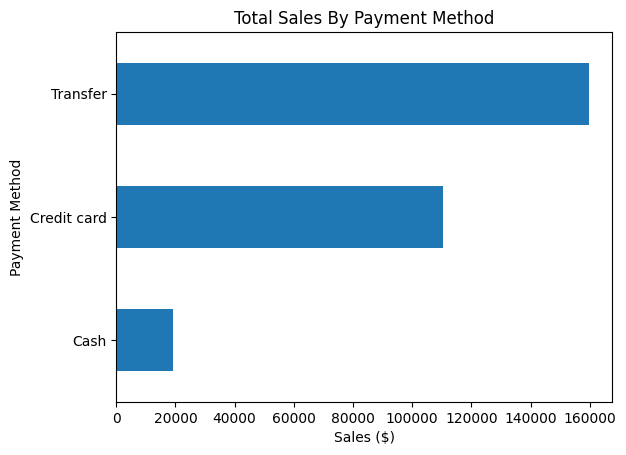

In [9]:
sales_by_payment.plot(kind='barh', title='Total Sales By Payment Method', xlabel='Sales ($)', ylabel='Payment Method')
plt.show()

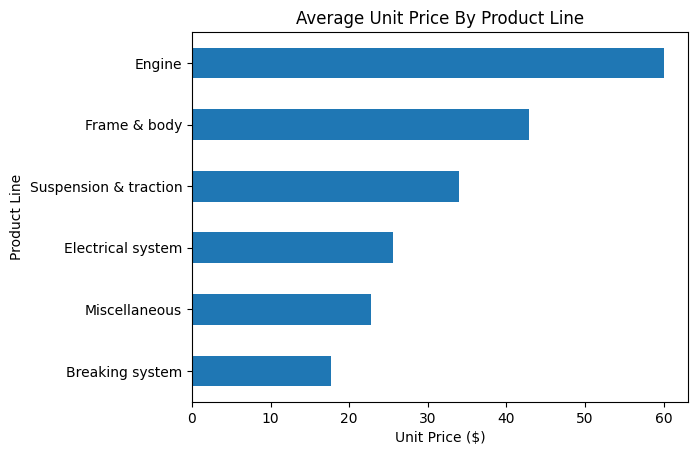

In [10]:
# Average unit price for each product line
avg_price_by_product_line = df.groupby('product_line')['unit_price'].mean()
avg_price_by_product_line.sort_values(ascending=True, inplace=True)
avg_price_by_product_line.plot(kind='barh', title='Average Unit Price By Product Line', xlabel='Unit Price ($)', ylabel='Product Line')
plt.show()

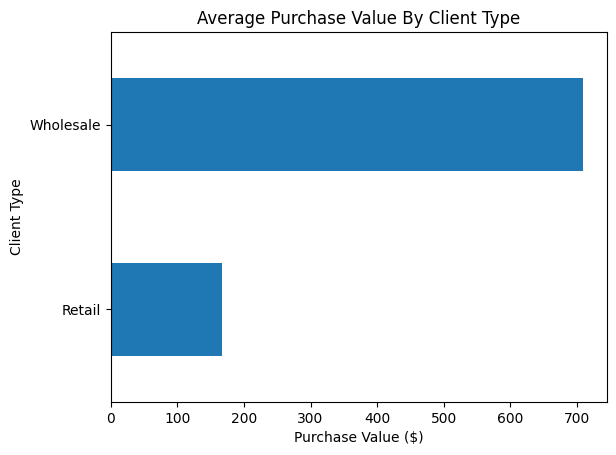

In [11]:
# Average purchase value by client type
avg_purchase_by_client = df.groupby('client_type')['total'].mean()
avg_purchase_by_client.sort_values(ascending=True, inplace=True)
avg_purchase_by_client.plot(kind='barh', title='Average Purchase Value By Client Type', xlabel='Purchase Value ($)', ylabel='Client Type')
plt.show()

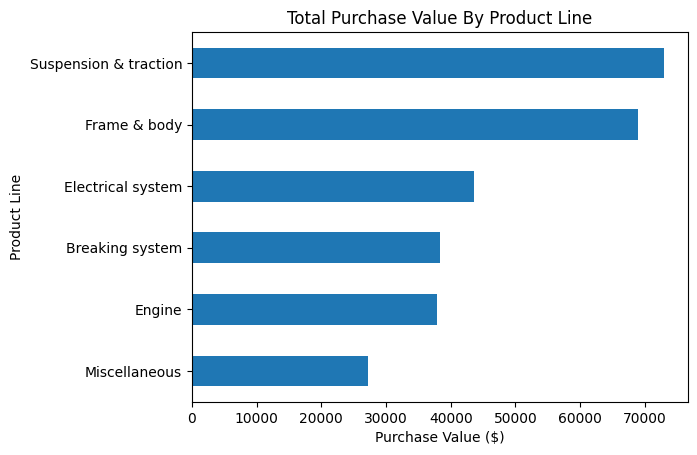

In [12]:
# Total purchase value by product line
total_purchase_by_product_line = df.groupby('product_line')['total'].sum()
total_purchase_by_product_line.sort_values(ascending=True, inplace=True)
total_purchase_by_product_line.plot(kind='barh', title='Total Purchase Value By Product Line', xlabel='Purchase Value ($)', ylabel='Product Line')
plt.show()

client_type  payment    
Retail       Cash            19199.10
             Credit card    110271.57
Wholesale    Transfer       159642.33
Name: total, dtype: float64


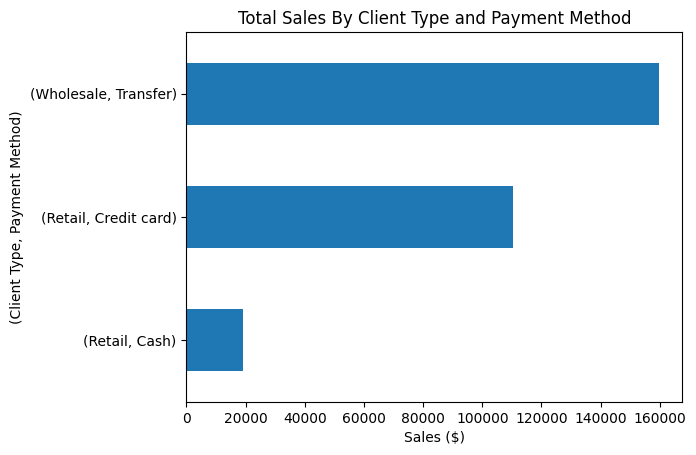

In [13]:
# Sales by client type and payment method
sales_by_client_payment = df.groupby(['client_type', 'payment'])['total'].sum()
sales_by_client_payment.plot(kind='barh', title='Total Sales By Client Type and Payment Method', xlabel='Sales ($)', ylabel='(Client Type, Payment Method)')
print(sales_by_client_payment)
plt.show()

product_line
Breaking system          17.740522
Miscellaneous            22.810738
Electrical system        25.585130
Suspension & traction    33.969868
Frame & body             42.832229
Engine                   60.091803
Name: unit_price, dtype: float64
product_line
Miscellaneous            27165.82
Engine                   37945.38
Breaking system          38350.15
Electrical system        43612.71
Frame & body             69024.73
Suspension & traction    73014.21
Name: total, dtype: float64


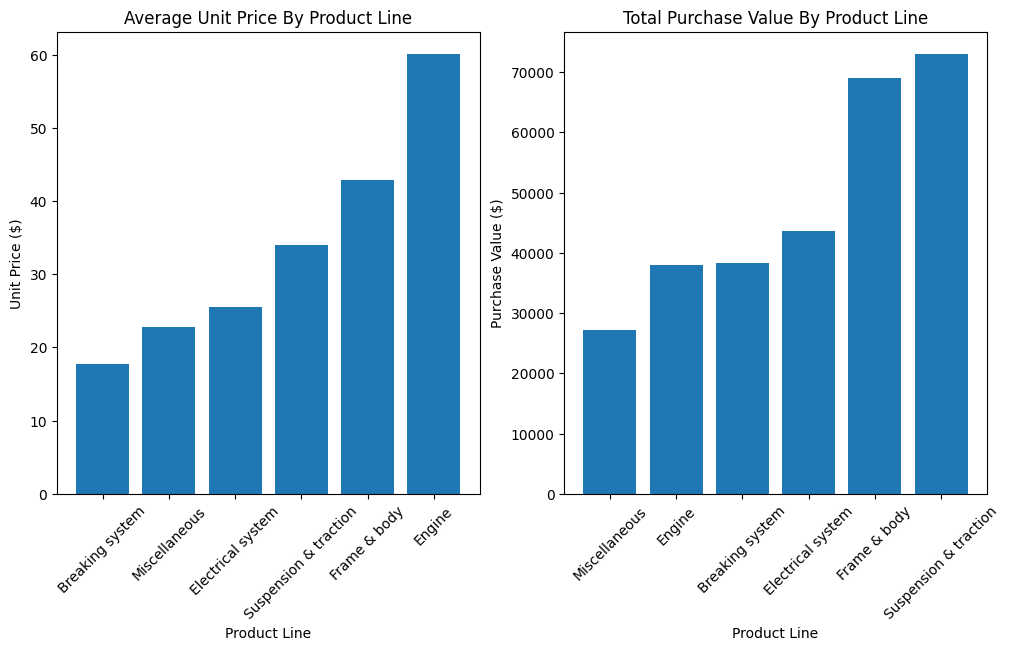

In [14]:
print(avg_price_by_product_line)
print(total_purchase_by_product_line)
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].bar(avg_price_by_product_line.index, avg_price_by_product_line)
ax[0].set_title("Average Unit Price By Product Line")
ax[0].set_xlabel('Product Line')
ax[0].set_ylabel('Unit Price ($)')

ax[1].bar(total_purchase_by_product_line.index, total_purchase_by_product_line)
ax[1].set_title("Total Purchase Value By Product Line")
ax[1].set_xlabel('Product Line')
ax[1].set_ylabel('Purchase Value ($)')
for x in ax:
    x.tick_params(axis='x', labelrotation=45)
plt.show()

client_type  product_line         
Retail       Miscellaneous            11418.01
             Breaking system          15219.25
Wholesale    Miscellaneous            15747.81
Retail       Engine                   16709.33
Wholesale    Engine                   21236.05
             Electrical system        21754.41
Retail       Electrical system        21858.30
Wholesale    Breaking system          23130.90
Retail       Frame & body             29546.84
             Suspension & traction    34718.94
Wholesale    Suspension & traction    38295.27
             Frame & body             39477.89
Name: total, dtype: float64


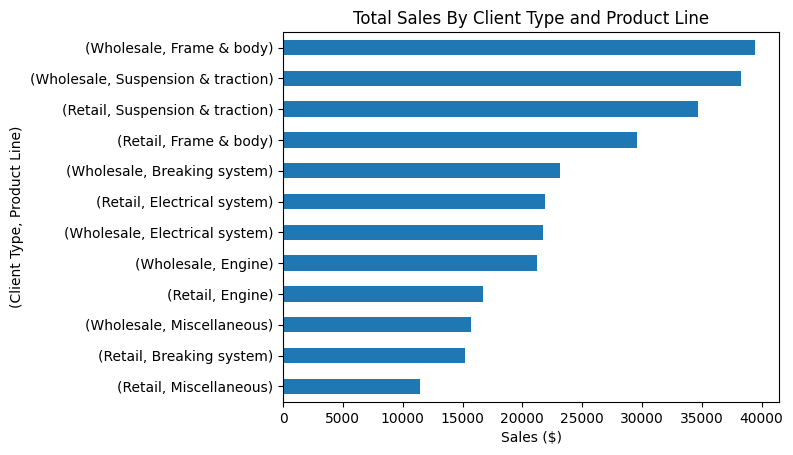

In [15]:
# Sales by client type and product line
sales_by_client_product = df.groupby(['client_type', 'product_line'])['total'].sum()
sales_by_client_product.sort_values(ascending=True, inplace=True)
sales_by_client_product.plot(kind='barh', title='Total Sales By Client Type and Product Line', xlabel='Sales ($)', ylabel='(Client Type, Product Line)')
print(sales_by_client_product)
plt.show()

warehouse  client_type
West       Wholesale      22719.30
           Retail         24207.19
North      Retail         42137.36
           Wholesale      58066.27
Central    Retail         63126.12
           Wholesale      78856.76
Name: total, dtype: float64


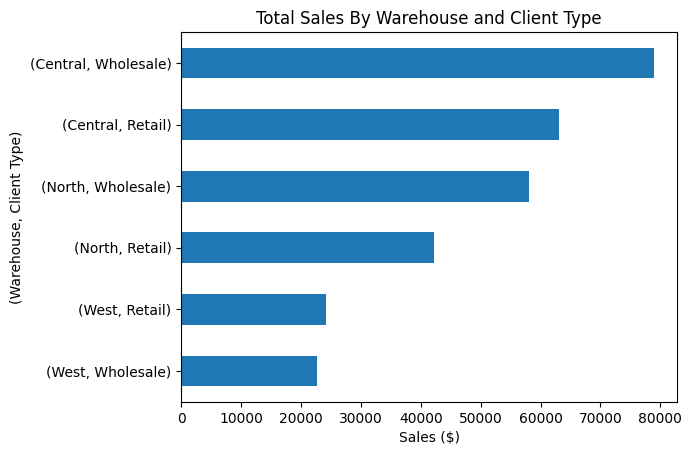

In [16]:
# Total sales by client and warehouse
product_by_client_and_warehouse = df.groupby(['warehouse', 'client_type'])['total'].sum()
product_by_client_and_warehouse.sort_values(ascending=True, inplace=True)
product_by_client_and_warehouse.plot(kind='barh', title='Total Sales By Warehouse and Client Type', xlabel='Sales ($)', ylabel='(Warehouse, Client Type)')
print(product_by_client_and_warehouse)
plt.show()

product_line           warehouse
Engine                 West          3445.51
Miscellaneous          West          6326.27
Electrical system      West          6370.88
Engine                 North         7236.73
Miscellaneous          North         8618.67
Breaking system        West          9969.49
Suspension & traction  West         10228.03
Frame & body           West         10586.31
Breaking system        North        10588.13
Miscellaneous          Central      12220.88
Electrical system      North        15247.27
Breaking system        Central      17792.53
Electrical system      Central      21994.56
Engine                 Central      27263.14
Frame & body           North        28397.86
                       Central      30040.56
Suspension & traction  North        30114.97
                       Central      32671.21
Name: total, dtype: float64


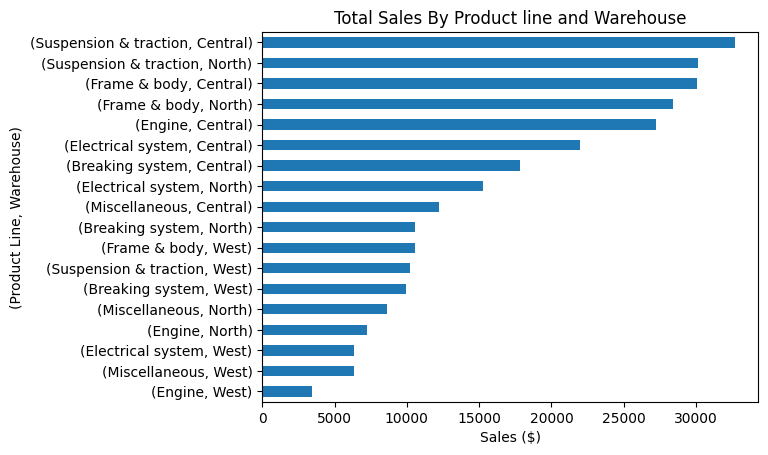

In [17]:
# Total sales by product line and warehouse
sales_by_product_and_warehouse = df.groupby(['product_line', 'warehouse'])['total'].sum()
sales_by_product_and_warehouse.sort_values(ascending=True, inplace=True)
sales_by_product_and_warehouse.plot(kind='barh', title='Total Sales By Product line and Warehouse', xlabel='Sales ($)', ylabel='(Product Line, Warehouse)')
print(sales_by_product_and_warehouse)
plt.show()

# **Findings**

## 1. The highest total sales is made by bank transfer payment method. Furthermore, this payment method is made by only wholesale clients who usually made large purchases from our company. Retail clients who visited the warehouses made payment using either credit cards or cash.

## 2. The top 3 products that have the highest average unit price are _engine, frame & body, and suspension & traction_. Engine has the highest unit average unit price but its purchase value is ranked 5 out of the 6 products sold. This shows that engine has low sales revenue.

## 3. Total sales for warehouse in Central is highest among the 3 warehouses.

